# Wavelet study
Wavelet transform can obtain a two dimensional representation of the periodic signal with simutaneous localization in time and frequency space domains.<br>
Wavelet transform of a given signal $\chi(k)$ is defined as:
$$w(a,b)=\sqrt{a}\int^{+\infty}_{-\infty} \chi(k)\phi(a(k-b))dk$$
where $\phi$ is a wavelet function, and $a$ and $b$ are the scale and translation parameters, respectively.<br>

Applications:
  * The reconstruction of **radial distruction function** from noisy EXAFS signals of copper has been performed in [3] based on the wavelet Galerkin regularization(use Daubechies-type wavelet).
  * **identification of overlapping contributions**, in particular, coming from neighboring atoms of different type of scattering events of different order such as single and multiple-scattering.
    * Wavelet:
      * continuous Cauchy WT wavelet[6,9-11]
      * Morlet WT wavelet[7,12,14]
      * FEFF-Morlet wavelet[13]
        * take into account the scattering properties of the atoms as computed within the FEFF formalism[15] and provides better discrimination of different atoms at similar distances than the Morlet wavelet[13].

  



In [1]:
import numpy as np
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import plotly.express as px 
import pywt
from scipy.fft import fft, ifft,fftfreq,fftshift

In [2]:
%matplotlib widget

# Beginning: decomposation of a signal
$$\chi(x)=sin(4x)e^{-(x-5)^2}sin(8x)e^{-(x-10)^2}$$


159


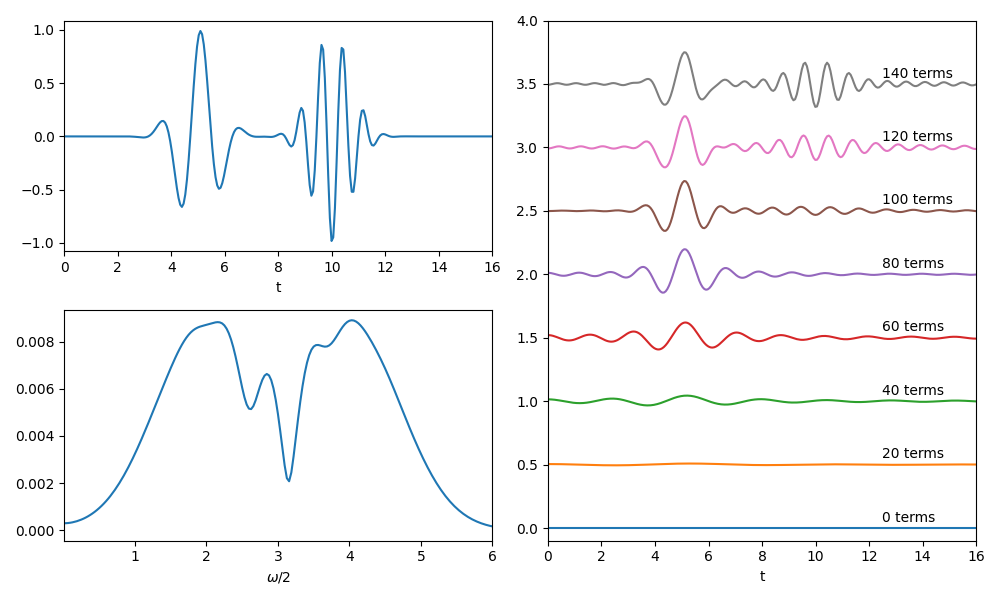

In [11]:
x=2*np.pi*np.arange(0,16,0.01)
chi1=np.sin(4*x)*np.exp(-(x-5)**2)+np.sin(8*x)*np.exp(-(x-10)**2)
f_f=fft(chi1,1600)

f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)

yplot = fftshift(f_f)

fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,2,1)
ax1.plot(x,chi1)
ax1.set_xlim(0,16)
ax1.set_xlabel('t')

ax2=fig.add_subplot(2,2,3)
ax2.plot(f_f_freq/2,np.abs(yplot)*1/len(x))
ax2.set_xlabel('$\omega$/2')
#ax[1].set_ylim([0.01,1])
ax2.set_xlim([0.01,6])

ax3=fig.add_subplot(1,2,2)
freq=f_f_freq
freq=f_f_freq[(f_f_freq<10)&(f_f_freq>0)]
indices=np.where((f_f_freq<10)&(f_f_freq>0))
A=np.real(yplot)
A=A[indices]
print(len(A))
num=0
f_series=np.zeros(len(x))
for i in range(0,len(freq)):
    f_series+=(A[i]/len(x))*np.cos(freq[i]*x)
    if i%20==0:
        ax3.plot(x,f_series+0.5*num)
        ax3.text(12.5,0.5*num+0.05,f'{num*20} terms')
        num+=1
#ax3.plot(x,np.cos(freq[0]*x))
ax3.set_xlim(0,16)
ax3.set_ylim(-0.1,4)
ax3.set_xlabel('t')
fig.tight_layout()

## 1. Some mother wavelets

### 1.1 Morlet wavelet

$\phi(t)=exp(i\omega_0t)exp(-\sigma^2_0t^2)$ in paper[1].<br>
$\sigma_0$ equals always to 1 $\AA$<br>
* The Morlet wavelet in the pywavelets package:
   - Morlet wavelet<br>
    $$\phi(t) = e^{-\frac{t^2}{2}}cos(5t)$$
   - Complex Morlet Wavelet<br>
   $$\phi(t) = \frac{1}{\sqrt{\pi B}}exp^{-\frac{t^2}{B}}exp^{i2\pi Ct}$$
   where B is the **Bandwidth**, C is the **center frequency**.

**<span style="color:yellow">remember always a</span> $\color{yellow}{2\pi}$ <span style="color:yellow">in the cosine, sine function, so we need to sample with</span> $\color{yellow}{2\pi.}$**




1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.


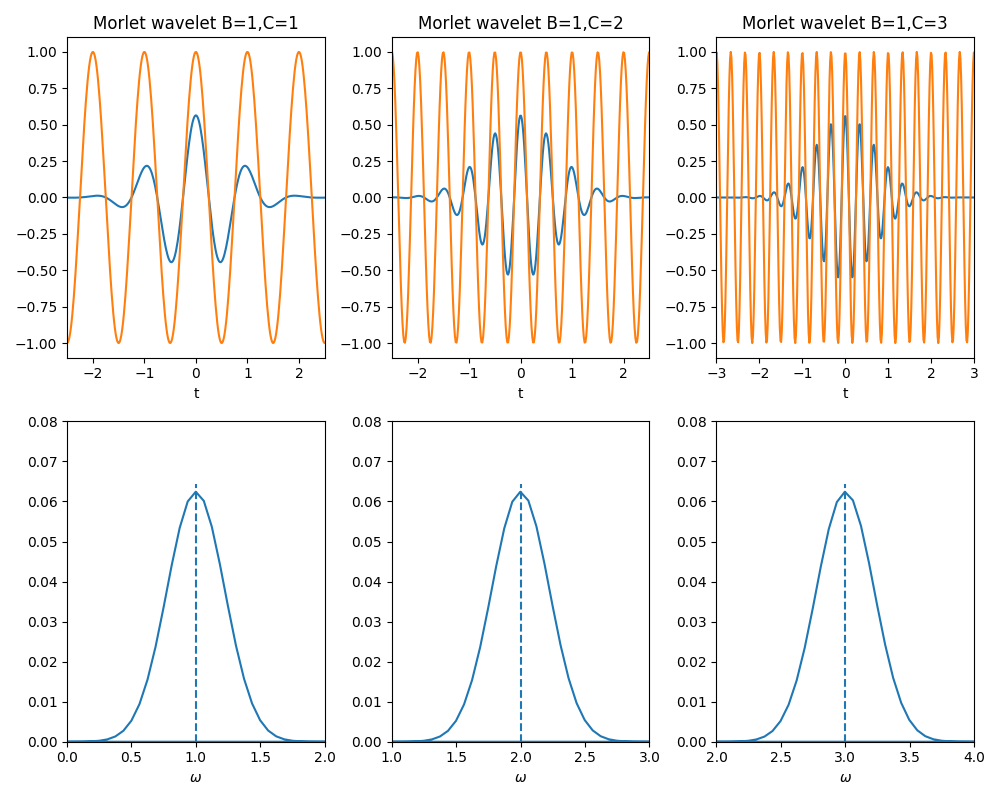

In [12]:
fig=plt.figure(figsize=(10,8))
x=np.linspace(-8,8,1000)
wav=pywt.ContinuousWavelet('cmor1-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(231)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-2.5,2.5)
ax.set_title('Morlet wavelet B=1,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(234)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")


wav=pywt.ContinuousWavelet('cmor1-2')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(232)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*2*x))
ax.set_xlabel("t")
ax.set_xlim(-2.5,2.5)
ax.set_title('Morlet wavelet B=1,C=2')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(235)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(2,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(1,3)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")



wav=pywt.ContinuousWavelet('cmor1-3')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(233)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*3*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-3,3)
ax.set_title('Morlet wavelet B=1,C=3')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(236)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(3,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(2,4)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")


1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.
cmor3-1 bandwidth:1.2487792968750009
cmor3-1 bandwidth:8.304985337243401


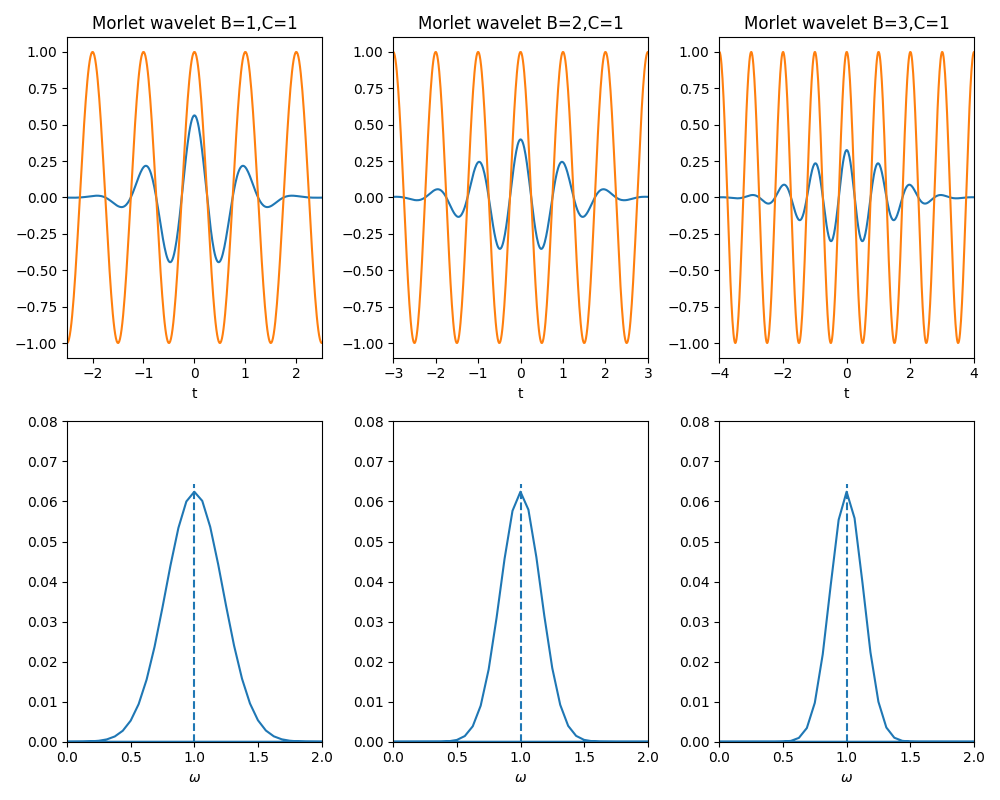

In [13]:
half_height=0.062/2
fig=plt.figure(figsize=(10,8))
x=np.linspace(-8,8,1000)
wav=pywt.ContinuousWavelet('cmor1-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(231)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-2.5,2.5)
ax.set_title('Morlet wavelet B=1,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
half_height=np.max(np.abs(f_f)*1/len(x))/2
print(len(f_f_freq))
ax=fig.add_subplot(234)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")


wav=pywt.ContinuousWavelet('cmor2-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(232)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-3,3)
ax.set_title('Morlet wavelet B=2,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(235)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')

ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")



wav=pywt.ContinuousWavelet('cmor3-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(233)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-4,4)
ax.set_title('Morlet wavelet B=3,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(236)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")

index=np.where(np.round(np.real(f_f),3)!=0)
real_freq=f_f_freq[index]
bandwidth=real_freq[-1]-real_freq[0]
print(f'cmor3-1 bandwidth:{bandwidth}')
index_x=np.where((np.round(np.real(phi),3)!=0)&(np.round(np.real(phi),3)>0))
real_x=x[index_x]
bandwidth_x=real_x[-1]-real_x[0]
print(f'cmor3-1 bandwidth:{bandwidth_x}')

Continuous wavelet will be evaluated over the range [-8.0, 8.0]


Text(0.5, 1.0, '|FFT(filter)|$^2$')

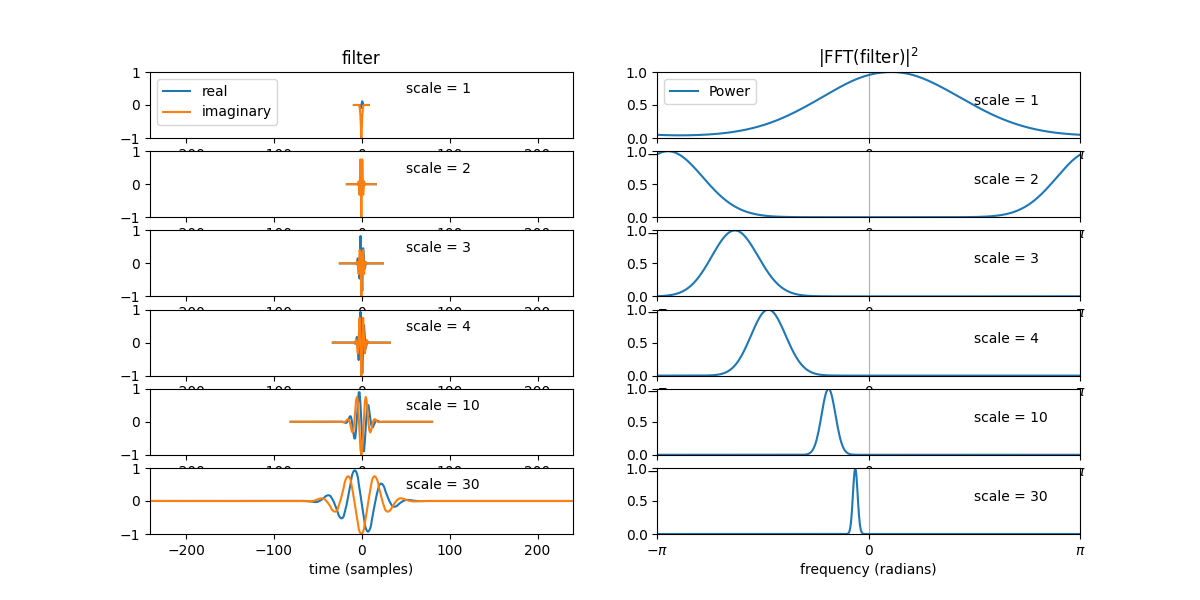

In [14]:
wav=pywt.ContinuousWavelet('cmor1-1')
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

width = wav.upper_bound - wav.lower_bound

scales = [1, 2, 3, 4, 10, 30]

max_len = int(np.max(scales)*width + 1)
t = np.arange(max_len)
fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
for n, scale in enumerate(scales):
    # The following code is adapted from the internals of cwt
    int_psi, x = pywt.integrate_wavelet(wav, precision=10)
    step = x[1] - x[0]
    j = np.floor(
        np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(np.int_)

    # normalize int_psi for easier plotting
    int_psi /= np.abs(int_psi).max()

    # discrete samples of the integrated wavelet
    filt = int_psi[j][::-1]

    # The CWT consists of convolution of filt with the signal at this scale
    # Here we plot this discrete convolution kernel at each scale.

    nt = len(filt)
    t = np.linspace(-nt//2, nt//2, nt)
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len//2, max_len//2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))

    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
    axes[n, 1].plot(f, np.abs(filt_fft)**2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].grid(True, axis='x')
    axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))

axes[n, 0].set_xlabel('time (samples)')
axes[n, 1].set_xlabel('frequency (radians)')
axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')
axes[0, 0].set_title('filter')
axes[0, 1].set_title(r'|FFT(filter)|$^2$')
# plt.tight_layout()

In [15]:
len(chi1)

1600

In [16]:
wav=pywt.ContinuousWavelet('cmor6-1')
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

Continuous wavelet will be evaluated over the range [-8.0, 8.0]


## 1.2 One example of Fourier transform and wavelet transform
<ins>**Function**</ins>:
$$\chi(x)=sin(4x)e^{-(x-5)^2}sin(8x)e^{-(x-10)^2}$$

c:\Users\kaife\Anaconda3\envs\work\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


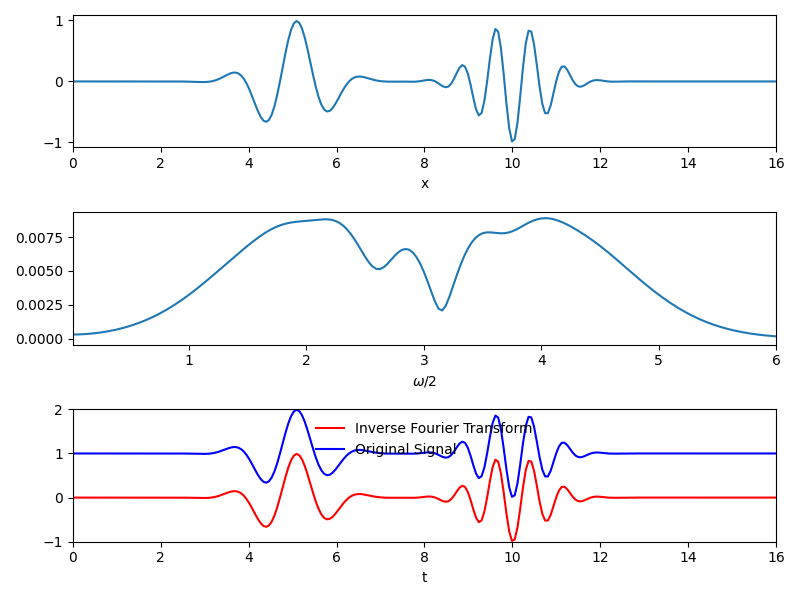

In [17]:
from scipy.fft import fft, ifft,fftfreq,fftshift
x=2*np.pi*np.arange(0,16,0.01)
chi1=np.sin(4*x)*np.exp(-(x-5)**2)+np.sin(8*x)*np.exp(-(x-10)**2)
f_f=fft(chi1,1600)

f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
fig,ax=plt.subplots(3,1,figsize=(8,6))
ax[1].plot(f_f_freq/2,np.abs(yplot)*1/len(x))
ax[1].set_xlabel('$\omega$/2')
#ax[1].set_ylim([0.01,1])
ax[1].set_xlim([0.01,6])
ax[0].plot(x,chi1)
ax[0].set_xlim(0,16)
ax[0].set_xlabel('x')
f_f_back=ifft(f_f)
ax[2].plot(x,f_f_back,'r',label="Inverse Fourier Transform")
ax[2].plot(x,chi1+1,'b',label="Original Signal")
ax[2].set_ylim(-1,2)
ax[2].set_xlim(0,16)
ax[2].legend(frameon=False)
ax[2].set_xlabel('t')
plt.tight_layout()
plt.show()

c:\Users\kaife\Anaconda3\envs\work\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


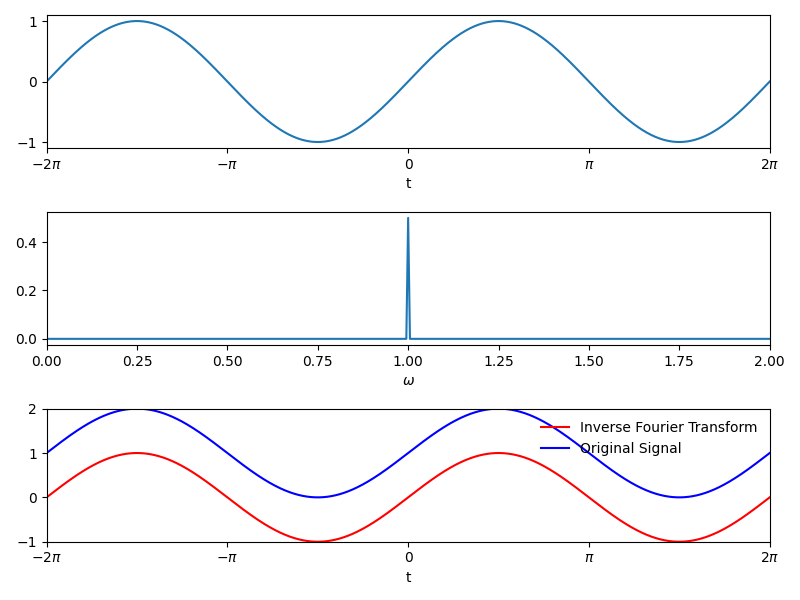

In [19]:
#super simple case: A sin function
from scipy.fft import fft, ifft,fftfreq,fftshift
x=2*np.pi*np.arange(-100,100,0.001)
chi1=np.sin(x)
f_f=fft(chi1)

f_f_freq=fftfreq(len(chi1),d=0.001)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
fig,ax=plt.subplots(3,1,figsize=(8,6))
ax[1].plot(f_f_freq,np.abs(yplot)*1/len(x))
ax[1].set_xlabel('$\omega$')
#ax[1].set_ylim([0.01,1])
ax[1].set_xlim([0,2])
ax[0].plot(x,chi1)
ax[0].set_xlabel('t')
ax[0].set_xlim(-2*np.pi,2*np.pi)
ax[0].set_xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],['$-2\pi$','$-\pi$','0','$\pi$','$2\pi$'])
f_f_back=ifft(f_f)
ax[2].plot(x,f_f_back,'r',label="Inverse Fourier Transform")
ax[2].plot(x,chi1+1,'b',label="Original Signal")
ax[2].set_ylim(-1,2)
ax[2].set_xlim(-2*np.pi,2*np.pi)
ax[2].set_xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],['$-2\pi$','$-\pi$','0','$\pi$','$2\pi$'])
ax[2].legend(frameon=False)
ax[2].set_xlabel('t')
plt.tight_layout()
plt.show()

In [11]:
np.pi/2

1.5707963267948966

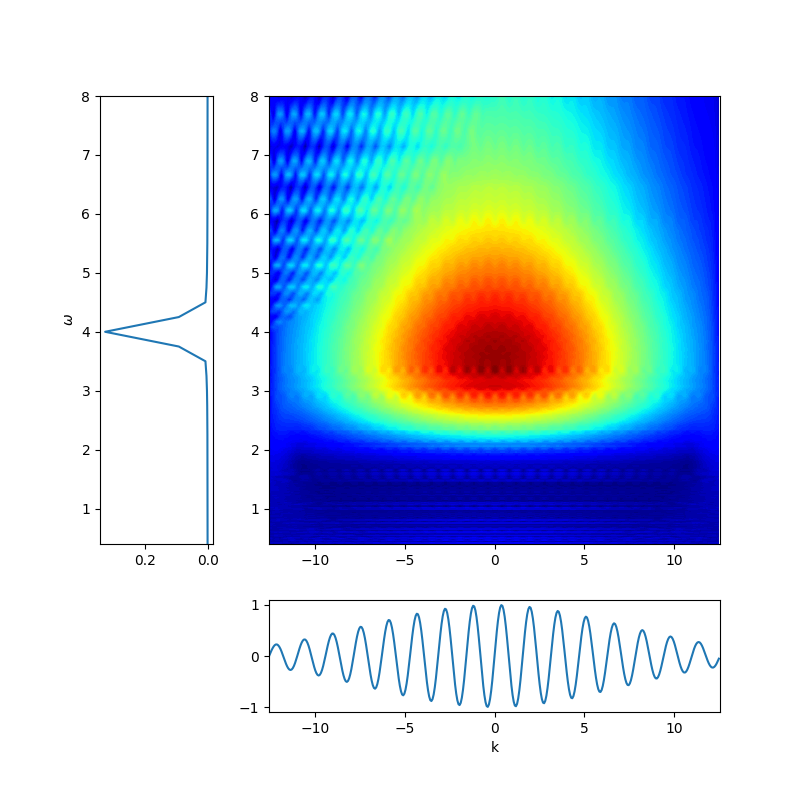

In [12]:

fig, ax = plt.subplots(2,2, figsize=(8,8), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [4, 1]})
x=2*np.pi*np.arange(-2,2,0.01)

chi1=np.sin(4*x)*np.exp(-x**2/100)
#fourier transform
f_f=fft(chi1)
f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
#wavelet transform
coef,freqs = pywt.cwt(chi1,np.arange(1,1000), 'cmor0.05-2',method='conv',sampling_period=0.01)

X, Y =np.meshgrid(x,freqs)
coef=np.abs(coef)
ax[0,1].contourf(X, Y,coef,cmap='jet',levels=100, vmax=coef.max(), vmin=-coef.min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
ax[0,1].set_ylim(0.4,8)
ax[0,1].set_xlim(-4*np.pi,4*np.pi)
ax[0,0].plot(np.abs(yplot)*1/len(x),f_f_freq, label='FFT')
# ax[0,0].plot(np.abs(f_f),f_f_freq)
#ax[0,0].set_xlim(0,0.008)
#ax[0,0].set_ylim(0.01,6)
ax[0,0].invert_xaxis()
ax[0,0].set_ylabel('$\omega$')
ax[0,0].sharey(ax[0,1])
ax[1,1].plot(x,chi1)
ax[1,1].set_xlabel('k')
ax[1,1].sharex(ax[0,1])

#change the subplot to axR
ax[1,0].remove()
plt.show()

#axR = ax.twinx()
#axR.plot(x,chi1)


In [13]:
f1 = pywt.scale2frequency('cmor6-0.5', 1)/0.01
f2 = pywt.scale2frequency('cmor6-0.5', 1000)/0.01
print(f1,f2)


50.0 0.05


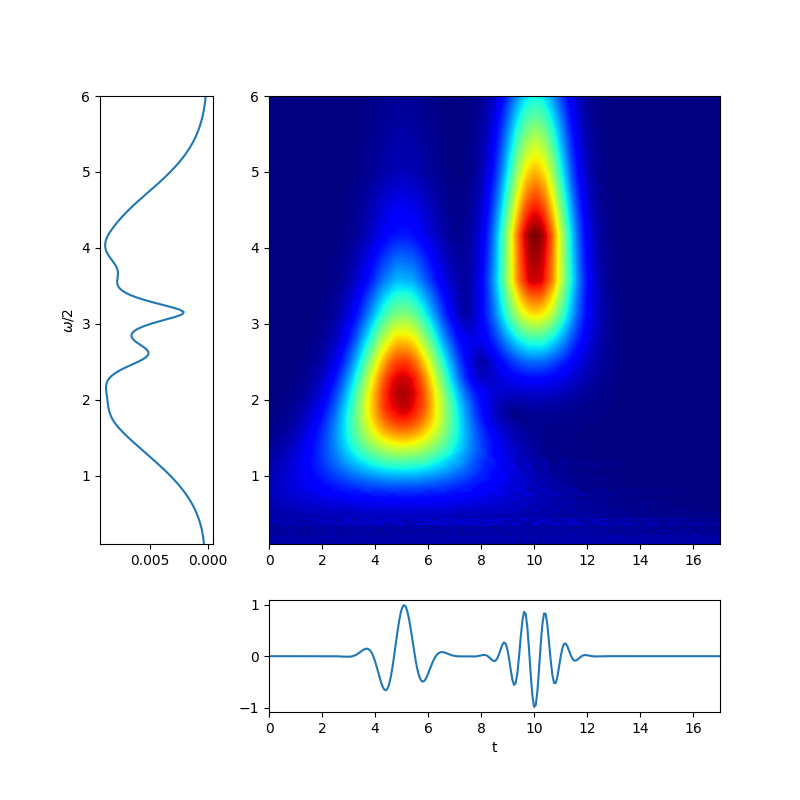

In [82]:
fig, ax = plt.subplots(2,2, figsize=(8,8), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [4, 1]})
x=2*np.pi*np.arange(0,16,0.01)

chi1=np.sin(4*x)*np.exp(-(x-5)**2)+np.sin(8*x)*np.exp(-(x-10)**2)
#fourier transform
f_f=fft(chi1,1600)
f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
#wavelet transform
coef,freqs = pywt.cwt(chi1,np.arange(1,1000), 'cmor5-0.5',method='conv',sampling_period=0.01)

X, Y =np.meshgrid(x,freqs)
coef=np.abs(coef)
ax[0,1].contourf(X, Y/2,coef,cmap='jet',levels=200, vmax=abs(coef).max(), vmin=-abs(coef).min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
ax[0,1].set_ylim(0.1,6)
ax[0,1].set_xlim(0,17)
ax[0,0].plot(np.abs(yplot)*1/len(x),f_f_freq/2, label='FFT')
# ax[0,0].plot(np.abs(f_f),f_f_freq)
#ax[0,0].set_xlim(0,0.008)
#ax[0,0].set_ylim(0.01,6)
ax[0,0].invert_xaxis()
ax[0,0].set_ylabel('$\omega/2$')
ax[0,0].sharey(ax[0,1])
ax[1,1].plot(x,chi1)
ax[1,1].set_xlabel('t')
ax[1,1].sharex(ax[0,1])

#change the subplot to axR
ax[1,0].remove()
plt.show()

#axR = ax.twinx()
#axR.plot(x,chi1)


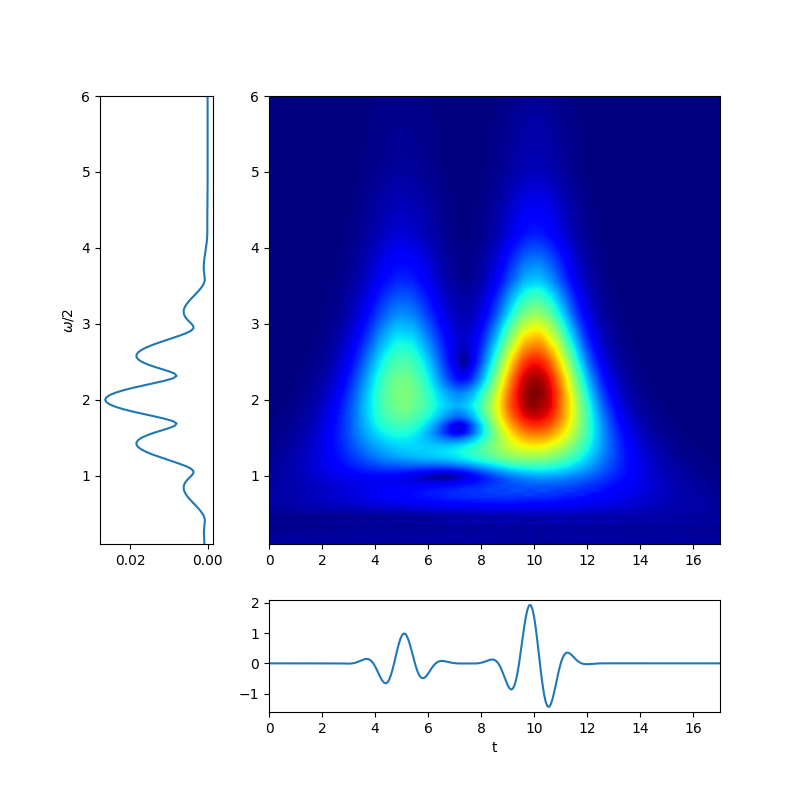

In [138]:
fig, ax = plt.subplots(2,2, figsize=(8,8), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [4, 1]})
x=2*np.pi*np.arange(0,16,0.01)

chi1=np.sin(4*x)*np.exp(-(x-5)**2)+2*np.sin(4*x)*np.exp(-(x-10)**2)
#fourier transform
f_f=fft(chi1,1600)
f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
#wavelet transform
coef,freqs = pywt.cwt(chi1,np.arange(1,1000), 'cmor5-0.5',method='conv',sampling_period=0.01)

X, Y =np.meshgrid(x,freqs)
coef=np.abs(coef)
ax[0,1].contourf(X, Y/2,coef,cmap='jet',levels=200, vmax=abs(coef).max(), vmin=-abs(coef).min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
ax[0,1].set_ylim(0.1,6)
ax[0,1].set_xlim(0,17)
ax[0,0].plot(np.abs(yplot)*1/len(x),f_f_freq/2, label='FFT')
# ax[0,0].plot(np.abs(f_f),f_f_freq)
#ax[0,0].set_xlim(0,0.008)
#ax[0,0].set_ylim(0.01,6)
ax[0,0].invert_xaxis()
ax[0,0].set_ylabel('$\omega/2$')
ax[0,0].sharey(ax[0,1])
ax[1,1].plot(x,chi1)
ax[1,1].set_xlabel('t')
ax[1,1].sharex(ax[0,1])

#change the subplot to axR
ax[1,0].remove()
plt.show()

#axR = ax.twinx()
#axR.plot(x,chi1)


# real wavelet transform on X-ray absorption spectra

In [15]:
def plot_wavelet(k, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = '$\omega/2$', 
                 xlabel = 'k'):
    
    dt = k[1] - k[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(k, np.log2(period), np.log2(power), contourlevels, extend='both',cmap='jet')
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()
    

In [16]:
freqs

array([50.        , 25.        , 16.66666667, 12.5       , 10.        ,
        8.33333333,  7.14285714,  6.25      ,  5.55555556,  5.        ,
        4.54545455,  4.16666667,  3.84615385,  3.57142857,  3.33333333,
        3.125     ,  2.94117647,  2.77777778,  2.63157895,  2.5       ,
        2.38095238,  2.27272727,  2.17391304,  2.08333333,  2.        ,
        1.92307692,  1.85185185,  1.78571429,  1.72413793,  1.66666667,
        1.61290323,  1.5625    ,  1.51515152,  1.47058824,  1.42857143,
        1.38888889,  1.35135135,  1.31578947,  1.28205128,  1.25      ,
        1.2195122 ,  1.19047619,  1.1627907 ,  1.13636364,  1.11111111,
        1.08695652,  1.06382979,  1.04166667,  1.02040816,  1.        ,
        0.98039216,  0.96153846,  0.94339623,  0.92592593,  0.90909091,
        0.89285714,  0.87719298,  0.86206897,  0.84745763,  0.83333333,
        0.81967213,  0.80645161,  0.79365079,  0.78125   ,  0.76923077,
        0.75757576,  0.74626866,  0.73529412,  0.72463768,  0.71

NameError: name 'cwtmatr' is not defined

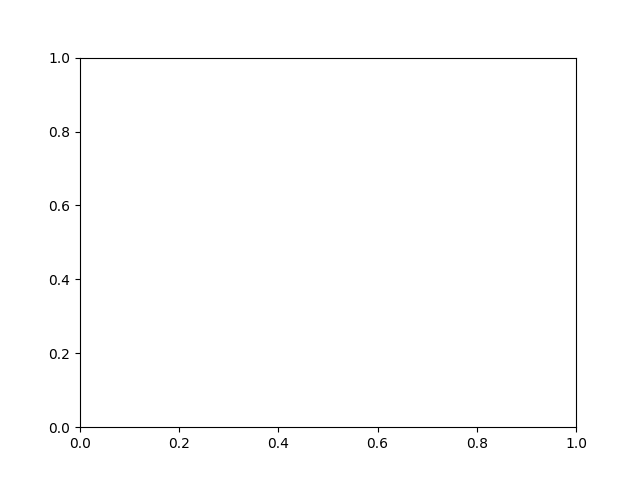

In [140]:
fig,ax=plt.subplots()
cwtmatr_yflip = np.flipud(cwtmatr)
ax.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [141]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
cwtmatr

array([[0.12295729, 0.82403097, 0.49659403, ..., 0.03778416, 0.41158457,
        0.88748015],
       [0.69769974, 1.43730443, 1.60158153, ..., 0.61310832, 1.30673555,
        1.37748468],
       [1.34653365, 1.81454133, 1.83427207, ..., 0.48377523, 1.18359425,
        1.40976794],
       ...,
       [0.09547932, 0.08849822, 0.08116842, ..., 0.30182776, 0.35401421,
        0.40324284],
       [0.0902296 , 0.08113826, 0.07175717, ..., 0.23613821, 0.28545125,
        0.33304506],
       [0.08276783, 0.07114499, 0.05934224, ..., 0.18429729, 0.23045273,
        0.27607165]])

In [191]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

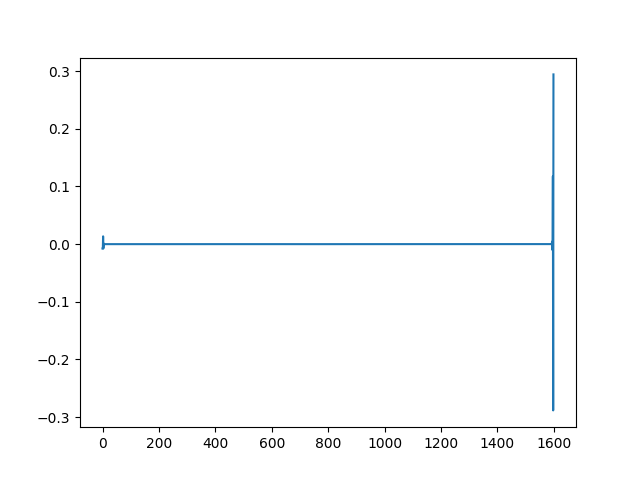

In [62]:
plt.figure()
plt.plot(coef[1])